# Exploration KREDITKARTENZAHLUNGSVERKEHRS FÜR ONLINE-EINKÄUFE

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Daten Einlesen und Erstellen eines DF für die Transaktionskosten der PSP

In [2]:
df = pd.read_excel("../../data/raw/PSP_Jan_Feb_2019.xlsx", index_col=0)

In [6]:
psp = pd.DataFrame([["Moneycard",5,2],["Goldcard",10,5],["UK_Card",3,1],["Simplecard",1,0.5]],columns = ["psp","amount_success","amount_failed"])

### Exploration

In [8]:
df.head()

,tmsp,country,amount,success,PSP,3D_secured,card
0,2019-01-01 00:01:11,Germany,89,0,UK_Card,0,Visa
1,2019-01-01 00:01:17,Germany,89,1,UK_Card,0,Visa
2,2019-01-01 00:02:49,Germany,238,0,UK_Card,1,Diners
3,2019-01-01 00:03:13,Germany,238,1,UK_Card,1,Diners
4,2019-01-01 00:04:33,Austria,124,0,Simplecard,0,Diners


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50410 entries, 0 to 50409
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   tmsp        50410 non-null  datetime64[ns]
 1   country     50410 non-null  object        
 2   amount      50410 non-null  int64         
 3   success     50410 non-null  int64         
 4   PSP         50410 non-null  object        
 5   3D_secured  50410 non-null  int64         
 6   card        50410 non-null  object        
dtypes: datetime64[ns](1), int64(3), object(3)
memory usage: 3.1+ MB


#### Erkenntnisse:
 - 50410 Einträge ohne Fehlstellen
 - success und 3D_secured sind integer und keine Bools
 - Datentypen sehen korrekt aus. 

In [10]:
df.describe()

,tmsp,amount,success,3D_secured
count,50410,50410.000000,50410.000000,50410.000000
mean,2019-01-29 16:28:52.923269120,202.395715,0.202896,0.238266
min,2019-01-01 00:01:11,6.000000,0.000000,0.000000
25%,2019-01-14 12:00:36.249999872,133.000000,0.000000,0.000000
50%,2019-01-30 15:20:07.500000,201.000000,0.000000,0.000000
75%,2019-02-13 01:09:50.500000,269.000000,0.000000,0.000000
max,2019-02-28 23:48:19,630.000000,1.000000,1.000000
std,NaN,96.274730,0.402160,0.426027


#### Erkentnisse:
 - nur 20% der Bezahlungen wurden erfolgreich abgewickelt.
 - 23% waren 3D Secured
 - Die durchschnittliche Bezahlsumme liegt bei 202 Euro
 - Daten vom 30.01.2019 bis 28.02.2019

In [21]:
categorial_cols = ["PSP","country","success","3D_secured","card"]
for col in categorial_cols:
    print(df[col].value_counts(), "\n")

PSP
UK_Card       26459
Simplecard    12446
Moneycard      8297
Goldcard       3208
Name: count, dtype: int64 

country
Germany        30233
Switzerland    10338
Austria         9839
Name: count, dtype: int64 

success
0    40182
1    10228
Name: count, dtype: int64 

3D_secured
0    38399
1    12011
Name: count, dtype: int64 

card
Master    29002
Visa      11640
Diners     9768
Name: count, dtype: int64 



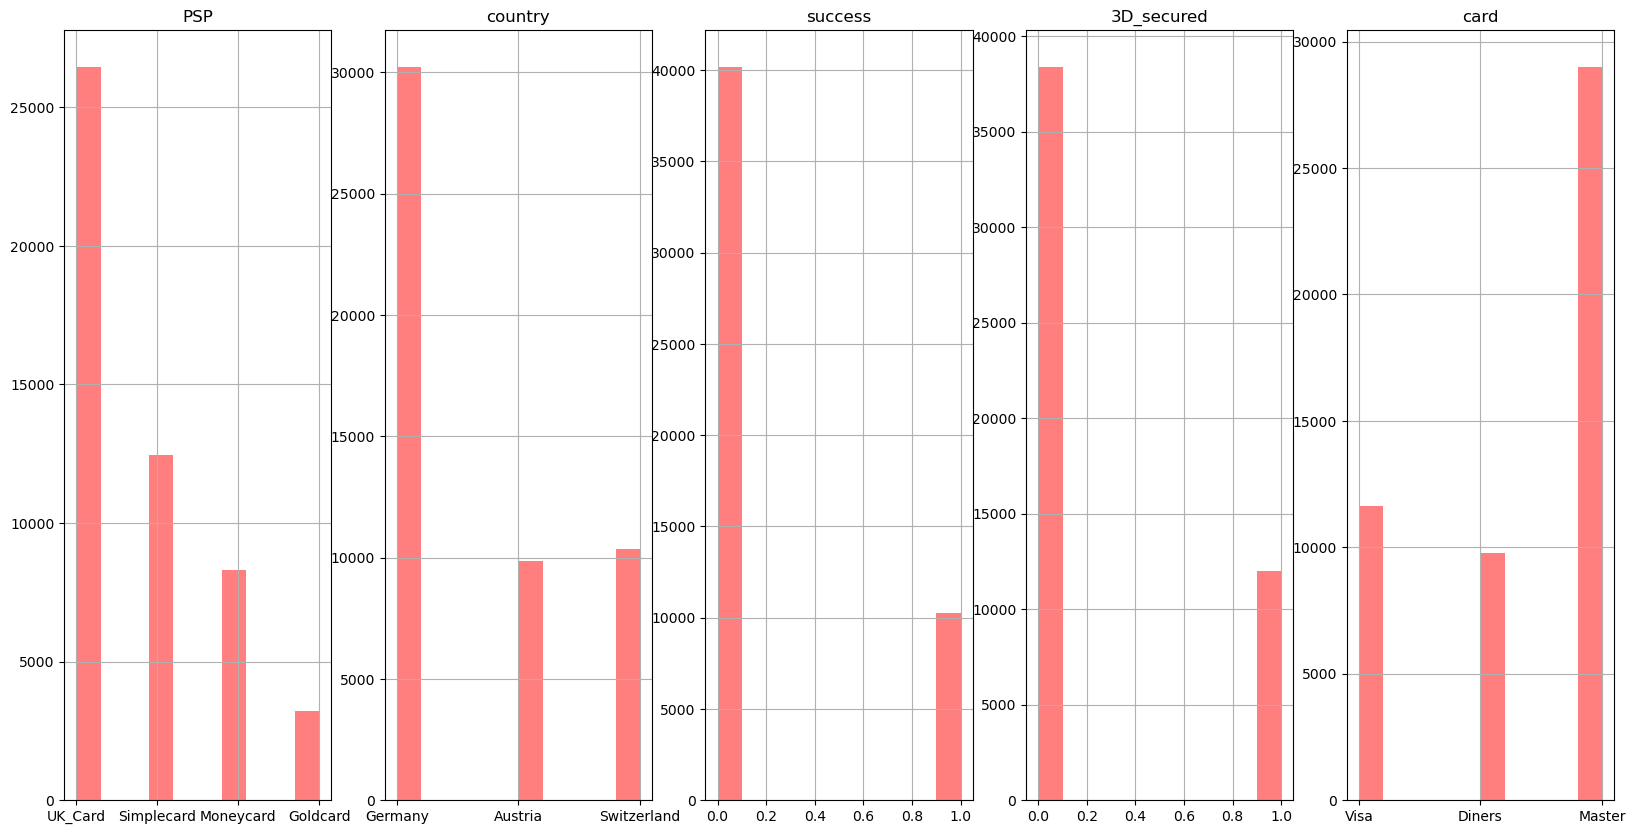

In [30]:
fig, ax = plt.subplots(1, len(categorial_cols), figsize=(20, 10))
for i, col in enumerate(categorial_cols):
    df[col].hist(ax=ax[i], alpha=0.5, color='red')
    ax[i].set_title(col)

#### Erkenntnisse: 
 - Keine kategoriale Spalte hat fehlerhafte Einträge
 - Alle psp provider, die in der Aufgabenstellung gegeben sind sind auch in den Daten enthalten.

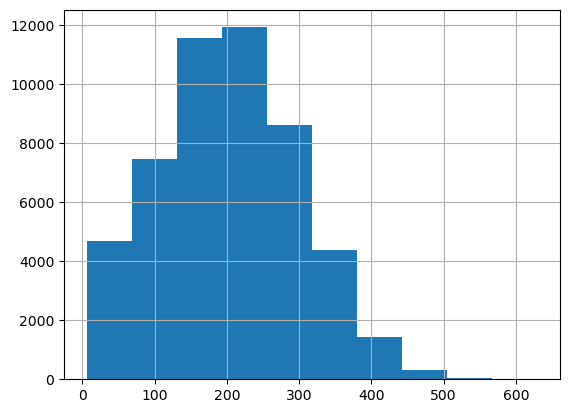

In [34]:
df["amount"].hist();

#### Erkenntnisse 
 - Die einzige kontinuierliche Variable ist die Höhe der Transaktion.
 - Rechtsschiefe Verteilung